In [285]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import requests
import os
import numpy.matlib as npmat
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import scipy.io

# Data loading and Data preprocessing




In [286]:
# Loading training data for digit 5
Numpyfile5training= scipy.io.loadmat("training_data_5.mat")
# Loading training data for digit 6
Numpyfile6training= scipy.io.loadmat("training_data_6.mat")
# Loading testing data for digit 5
Numpyfile5testing= scipy.io.loadmat("testing_data_5.mat")
# Loading testing data for digit 6
Numpyfile6testing= scipy.io.loadmat("testing_data_6.mat")

# Create an array to store your vectors
training_data_array5 = []
for val in Numpyfile5training['train_data_5']:
    a=val.flatten()
    training_data_array5.append(a)
npTrainingArray5 = np.array(training_data_array5)
# Training data for 6
training_data_array6 = []
for val in Numpyfile6training['train_data_6']:
    b=val.flatten()
    training_data_array6.append(b)
npTrainingArray6 = np.array(training_data_array6)
training_data = np.concatenate((npTrainingArray5, npTrainingArray6), axis=0)


# Testing data for 5
testing_data_array5 = []
for val in Numpyfile5testing['test_data_5']:
    a=val.flatten()
    testing_data_array5.append(a)
npTestingArray5 = np.array(testing_data_array5)
# Testing data for 6
testing_data_array6 = []
for val in Numpyfile6testing['test_data_6']:
    b=val.flatten()
    testing_data_array6.append(b)
npTestingArray6 = np.array(testing_data_array6)
# print(npTestingArray6[0][100])
testing_data = np.concatenate((npTestingArray5, npTestingArray6), axis=0)
# print(testing_data.shape)

In [287]:
# Output class vector, where we are assigning 0 for digit 5 and 1 for digit 6
y_train = np.concatenate((np.zeros(npTrainingArray5.shape[0], dtype='int'), np.ones(npTrainingArray6.shape[0], dtype='int')), axis=0)
y_test = np.concatenate((np.zeros(npTestingArray5.shape[0], dtype='int'), np.ones(npTestingArray6.shape[0], dtype='int')), axis=0)
print(y_train.shape, y_test.shape)
print(training_data)


(11339,) (1850,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# **TASK 1 : Feature normalization (Data conditioning)**

In [288]:
# Calculating mean and std for training data
training_mean_values = np.mean(training_data, axis=0)
# training_mean_values = npmat.repmat(training_mean_values, 11339, 1)
training_std_deviation = np.std(training_data, axis=0)
# training_std_deviation = npmat.repmat(training_std_deviation, 11339, 1)
training_std_deviation[training_std_deviation==0]=0.000001
normalized_training_data = (training_data - training_mean_values)/training_std_deviation
print(normalized_training_data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [289]:
# Calculating mean and std for testing data
testing_mean_values = np.mean(testing_data, axis=0)
# testing_mean_values = npmat.repmat(testing_mean_values, 1850, 1)
testing_std_deviation = np.std(testing_data, axis=0)
# training_std_deviation = npmat.repmat(testing_std_deviation, 1850, 1)
testing_std_deviation[testing_std_deviation==0]=0.000001
normalized_testing_data = (testing_data - testing_mean_values)/testing_std_deviation
print(normalized_testing_data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# **TASK 2 : PCA using the training samples**

In [290]:
# Function to calculate eigen vectors and eigenvalues
def eigenAnalysis(X , num_components):

    #Step-1
    cov_mat = np.cov(X , rowvar = False)

    #Step-2
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    #Step-3
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    #Step-4
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]

    return eigenvector_subset

In [291]:
# Function to do Principal Component Analysis
def PCA(X, eigenvector_subset):
    X_reduced = np.dot(eigenvector_subset.transpose() , X.transpose() ).transpose()
    return X_reduced

In [292]:
# Using eigenAnalysis function on normalized training data
eigen_training = eigenAnalysis(normalized_training_data , 2)
# Using PCA function to get PCA1 and PCA2 for training data
mat_reduced_training = PCA(normalized_training_data , eigen_training)
print(mat_reduced_training)

[[ 7.28930416 -4.12641308]
 [ 4.52845743  2.21921686]
 [ 7.91575916  0.50940245]
 ...
 [ 0.28151727  4.55499053]
 [ 0.9678347   7.12795008]
 [ 0.29674964  4.99643503]]


In [293]:
#Creating a Pandas DataFrame of the training Dataset
train_df_training = pd.DataFrame(mat_reduced_training)
train_df_training.shape

(11339, 2)

In [294]:
# Adding final column as 'Y' for y_train
train_df_training = pd.DataFrame(mat_reduced_training)
train_df_training['Y'] = y_train

train_df_training.head()
train_df_training.shape

(11339, 3)

# **TASK 3 : Dimension reduction using PCA**:

---





In [295]:
# Using PCA function to get projections of normalised testing data on PCA1 and PCA2
mat_reduced_testing = PCA(normalized_testing_data , eigen_training)
print(mat_reduced_testing)

[[ 6.93573955e-01 -2.31473362e+00]
 [-2.91939808e+00 -1.00752598e+01]
 [ 8.04077696e+00 -3.30429069e-01]
 ...
 [ 3.67081239e+00  6.50133691e+00]
 [-6.06605699e-03  9.52793760e+00]
 [-8.12796023e+00  7.22464597e+00]]


In [296]:
#Creating a Pandas DataFrame of the testing Dataset
test_df_testing = pd.DataFrame(mat_reduced_testing)
test_df_testing.shape

(1850, 2)

In [297]:
# Adding final column as 'Y' for y_test
test_df_testing = pd.DataFrame(mat_reduced_testing)
test_df_testing['Y'] = y_test

test_df_testing.head()
test_df_testing.shape

(1850, 3)

<Axes: xlabel='0', ylabel='1'>

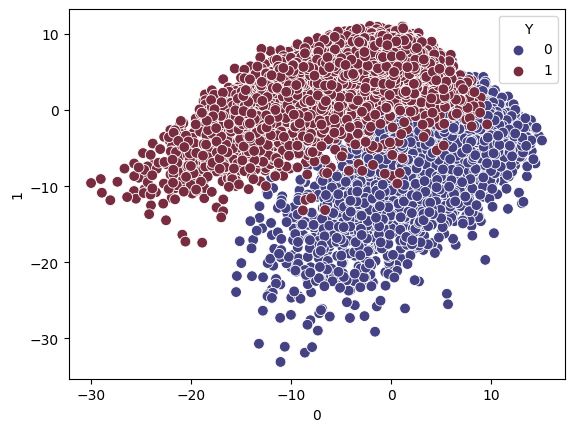

In [298]:
# Plotting the training data
sns.scatterplot(data = train_df_training , x = 0 , y = 1 , hue = train_df_training['Y'] , s = 60 , palette= 'icefire')

<Axes: xlabel='0', ylabel='1'>

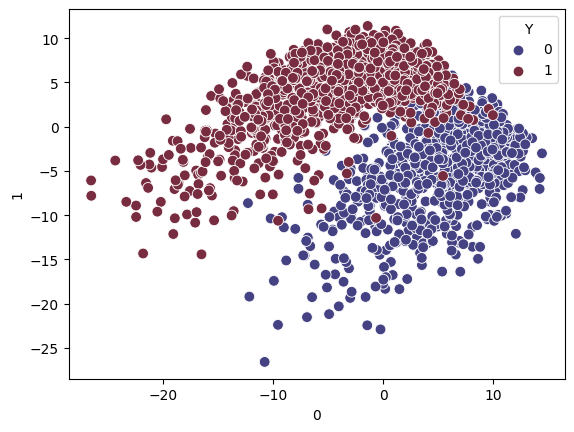

In [299]:
# Plotting the testing data
sns.scatterplot(data = test_df_testing , x = 0 ,y = 1 , hue = test_df_testing['Y'] , s = 60 , palette= 'icefire')

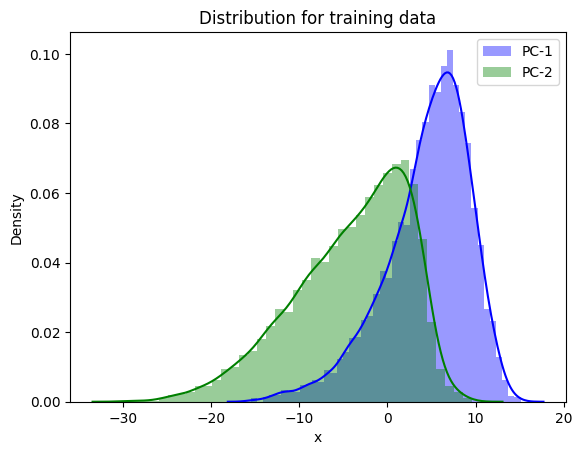

In [300]:
# Plotting the distribution for training data
x0_0 = train_df_training.loc[train_df_training.Y == 0, 0]
x0_1 = train_df_training.loc[train_df_training.Y == 1, 0]

sns.distplot(x0_0, color='blue', label='PC-1')
sns.distplot(x0_1, color='green', label='PC-2')
plt.gca().set(title='Distribution for training data', xlabel='x')
plt.legend()

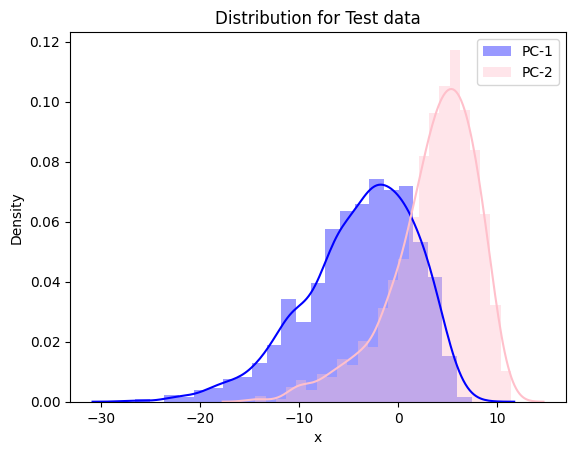

In [301]:
# Plotting the distribution for test data
x1_0 = test_df_testing.loc[test_df_testing.Y == 0, 1]
x1_1 = test_df_testing.loc[test_df_testing.Y == 1, 1]

sns.distplot(x1_0, color='blue', label='PC-1')
sns.distplot(x1_1, color='pink', label='PC-2')
plt.gca().set(title='Distribution for Test data', xlabel='x')
plt.legend()


# **TASK 4 : Density estimation**:





In [302]:
# Density Estimation for Class 5
mu_five = np.mean(train_df_training[[0, 1]][train_df_training['Y'] == 0])
print("Mean Vector for Class 5: ")
print(mu_five)

Mean Vector for Class 5: 
0    4.453207
1   -4.069514
dtype: float64


In [303]:
cov_mat_five = np.cov(train_df_training[[0, 1]][train_df_training['Y'] == 0].T)
print("Covariance Matrix for Class 5: ")
print(cov_mat_five)

Covariance Matrix for Class 5: 
[[23.39792743 15.13683929]
 [15.13683929 36.44222332]]


In [304]:
five_distribution = multivariate_normal(mu_five, cov_mat_five)

In [305]:
# Density Estimation for Class 6
mu_six = np.mean(train_df_training[[0, 1]][train_df_training['Y'] == 1])
print("Mean Vector for Class 6: ")
print(mu_six)

Mean Vector for Class 6: 
0   -4.079222
1    3.727752
dtype: float64


In [306]:
cov_mat_six = np.cov(train_df_training[[0, 1]][train_df_training['Y'] == 1].T)
print("Covariance Matrix for Class 6: ")
print(cov_mat_six)

Covariance Matrix for Class 6: 
[[42.26796632 17.9467385 ]
 [17.9467385  18.33394357]]


In [307]:
six_distribution = multivariate_normal(mu_six, cov_mat_six)

# **TASK 5:** **Bayesion Decision Theory for optimal classification**





In [308]:
# Calculate the probability density of the input values
p_x_five = lambda x: five_distribution.pdf(x)
p_x_six = lambda x: six_distribution.pdf(x)

In [309]:
# Function to classify different datapoints as either class 5 or class 6 based on posterior probability
def classify(datapoint, p_five, p_six):
    return 0 if p_x_five(datapoint) * p_five >= p_x_six(datapoint) * p_six else 1



In [310]:
# Calculating the predictions for class 5 and class 6
y_pred_train = [classify(i, p_five=0.5, p_six=0.5) for i in mat_reduced_training]
y_pred_test = [classify(i, p_five=0.5, p_six=0.5) for i in mat_reduced_testing]

In [311]:
# Appending the prediction vector to the original training and test datasets
train_df_training['Y_pred'] = y_pred_train
test_df_testing['Y_pred'] = y_pred_test

In [312]:
# Calculating the accuracy for training data
training_acc = np.mean(train_df_training['Y'] == train_df_training['Y_pred'])
print(training_acc)

0.9427639121615663


In [313]:
# Calculating the accuracy for tes data
testing_acc = np.mean(test_df_testing['Y'] == test_df_testing['Y_pred'])
print(testing_acc)

0.9394594594594594
